## 💪 Challenge I
Help your colleague gain insights on the type of vehicles that have lower CO2 emissions. Include:

1. What is the median engine size in liters?
2. What is the average fuel consumption for regular gasoline (Fuel Type = X), premium gasoline (Z), ethanol (E), and diesel (D)?  
3. What is the correlation between fuel consumption and CO2 emissions?
4. Which vehicle class has lower average CO2 emissions, 'SUV - SMALL' or 'MID-SIZE'? 
5. What are the average CO2 emissions for all vehicles? For vehicles with an engine size of 2.0 liters or smaller?
6. Any other insights you found during your analysis?

## 💾 The data I

### You have access to seven years of CO2 emissions data for Canadian vehicles ([source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6)):

- "Make" - The company that manufactures the vehicle.
- "Model" - The vehicle's model.
- "Vehicle Class" - Vehicle class by utility, capacity, and weight.
- "Engine Size(L)" - The engine's displacement in liters.
- "Cylinders" - The number of cylinders.
- "Transmission" - The transmission type: A = Automatic, AM = Automatic Manual, AS = Automatic with select shift, AV = Continuously variable, M = Manual, 3 - 10 = the number of gears.
- "Fuel Type" - The fuel type: X = Regular gasoline, Z = Premium gasoline, D = Diesel, E = Ethanol (E85), N = natural gas.
- "Fuel Consumption Comb (L/100 km)" - Combined city/highway (55%/45%) fuel consumption in liters per 100 km (L/100 km).
- "CO2 Emissions(g/km)" - The tailpipe carbon dioxide emissions in grams per kilometer for combined city and highway driving. 

The data comes from the Government of Canada's open data [website](https://open.canada.ca/en).

In [68]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = 'data/co2_emissions_canada.csv'
cars = pd.read_csv(data)
df = pd.DataFrame(cars)
array = df.to_numpy()
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,244
...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.4,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.9,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,10.3,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,9.9,232


# **1**. What is the median engine size in liters?

Here, for calculating median engine size of vehicles we would first:
1. Extract the column 'Engine Size(L)' from df assigning it a variable, _extract_engine_size_
2. Using median() method over _extract_engine_size_ and assigning it a variable, _median_engine_size_ and afterwards printing it.

In [69]:
# Column access to Engine Size (L)
extract_engine_size = df[["Engine Size(L)"]]

# Median Calculation 
median_engine_size = extract_engine_size.median()
print(median_engine_size)

Engine Size(L)    3.0
dtype: float64


So, the median engine size of the vehicles is **3 Litres**.

# 2. What is the average fuel consumption for regular gasoline (Fuel Type = X), premium gasoline (Z), ethanol (E), and diesel (D)?

In [70]:
avg_data = df.groupby(["Fuel Type"])[["Fuel Consumption Comb (L/100 km)"]].mean().round(2)
avg_fuel_consumption = avg_data.drop("N")
print(avg_fuel_consumption)

           Fuel Consumption Comb (L/100 km)
Fuel Type                                  
D                                      8.84
E                                     16.86
X                                     10.08
Z                                     11.42


So, the **Average Fuel Consumption(in L/km)** for vehicles having Fuel Type:
1. X = 10.08 L/km
2. Z = 11.42 L/km
3. E = 16.86 L/km
4. D = 8.84 L/km

# 3. What is the correlation between fuel consumption and CO2 emissions?

Here, we used scatter plot as we are analyzing correlation between two variables.

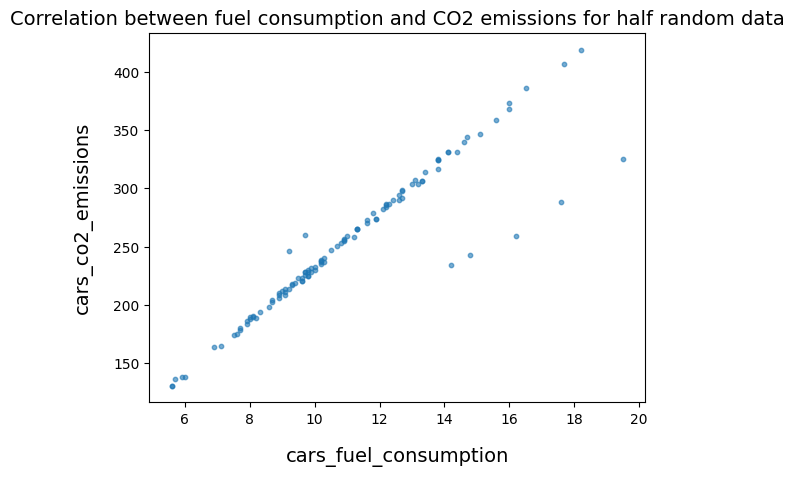

In [71]:
# Created sampling for half data to prevent overplotting
df_sample = df.sample(110)

# plot creation for half data
plt.scatter(df_sample['Fuel Consumption Comb (L/100 km)'], df_sample['CO2 Emissions(g/km)'], s=10, alpha = 0.6)
plt.title('Correlation between fuel consumption and CO2 emissions for half random data', fontsize=14)
plt.xlabel('cars_fuel_consumption', fontsize=14, labelpad=15)
plt.ylabel('cars_co2_emissions', fontsize=14, labelpad=15)
plt.show()

In the above scatter plot, we divided data using random sampling with sampling size to half of it i.e., 110 (as total no. of data rows = 223).

**The use of random sampling helped in:**
1. Prevent the data from overplotting
2. It helped in proper analyzing of data

**Analyse:**
- As the scatter plot has a rightward inclined shape, we can say that it has positive correlation.
- They have a positive correlation, which means when **'Fuel Consumption Comb (L/100 km)'** will increase then **'CO2 Emissions(g/km)'** will also increase.

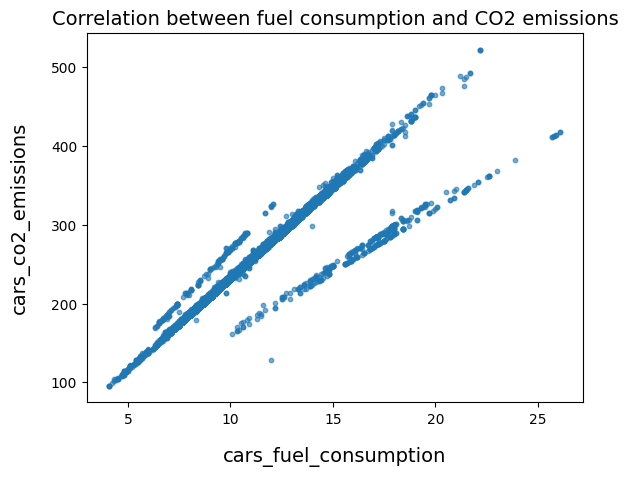

In [25]:
# plot creation for all data
plt.scatter(df['Fuel Consumption Comb (L/100 km)'], df['CO2 Emissions(g/km)'], s=10, alpha = 0.6)
plt.title('Correlation between fuel consumption and CO2 emissions', fontsize=14)
plt.xlabel('cars_fuel_consumption', fontsize=14, labelpad=15)
plt.ylabel('cars_co2_emissions', fontsize=14, labelpad=15)
plt.show()

In this scatter plot, we plot all the data points to check whether our assumptions of positive correlation between the two variables was correct or not. 

And hence, we can conclude that **'Fuel Consumption Comb (L/100 km)' and 'CO2 Emissions(g/km)' are in positive correlation**.

# 4. Which vehicle class has lower average CO2 emissions, 'SUV - SMALL' or 'MID-SIZE'? 

In [26]:
co2_emission = df.groupby(['Vehicle Class'])[['CO2 Emissions(g/km)']].mean()
avg_co2_emmision= co2_emission.loc[['MID-SIZE', 'SUV - SMALL'],['CO2 Emissions(g/km)']]
print(avg_co2_emmision)


               CO2 Emissions(g/km)
Vehicle Class                     
MID-SIZE                222.455428
SUV - SMALL             236.292523


So, **'MID-SIZE'** vehicle class has the lower average CO2 emission.

# 5. What are the average CO2 emissions for all vehicles? For vehicles with an engine size of 2.0 liters or smaller?

Here, we calculated the average CO2 emission for all vehicles.

               CO2 Emissions(g/km)
Make                              
SMART                       151.43
HONDA                       190.22
FIAT                        192.25
MAZDA                       193.67
MINI                        196.59
SCION                       200.45
MITSUBISHI                  200.51
HYUNDAI                     208.87
VOLKSWAGEN                  209.34
KIA                         214.29
SUBARU                      217.61
ACURA                       223.65
TOYOTA                      224.42
ALFA ROMEO                  224.90
VOLVO                       230.06
BUICK                       233.06
NISSAN                      236.86
LEXUS                       241.11
CHRYSLER                    246.17
JEEP                        250.34
AUDI                        250.85
BMW                         254.01
INFINITI                    254.06
PORSCHE                     258.94
FORD                        260.99
CHEVROLET                   264.35
CADILLAC            

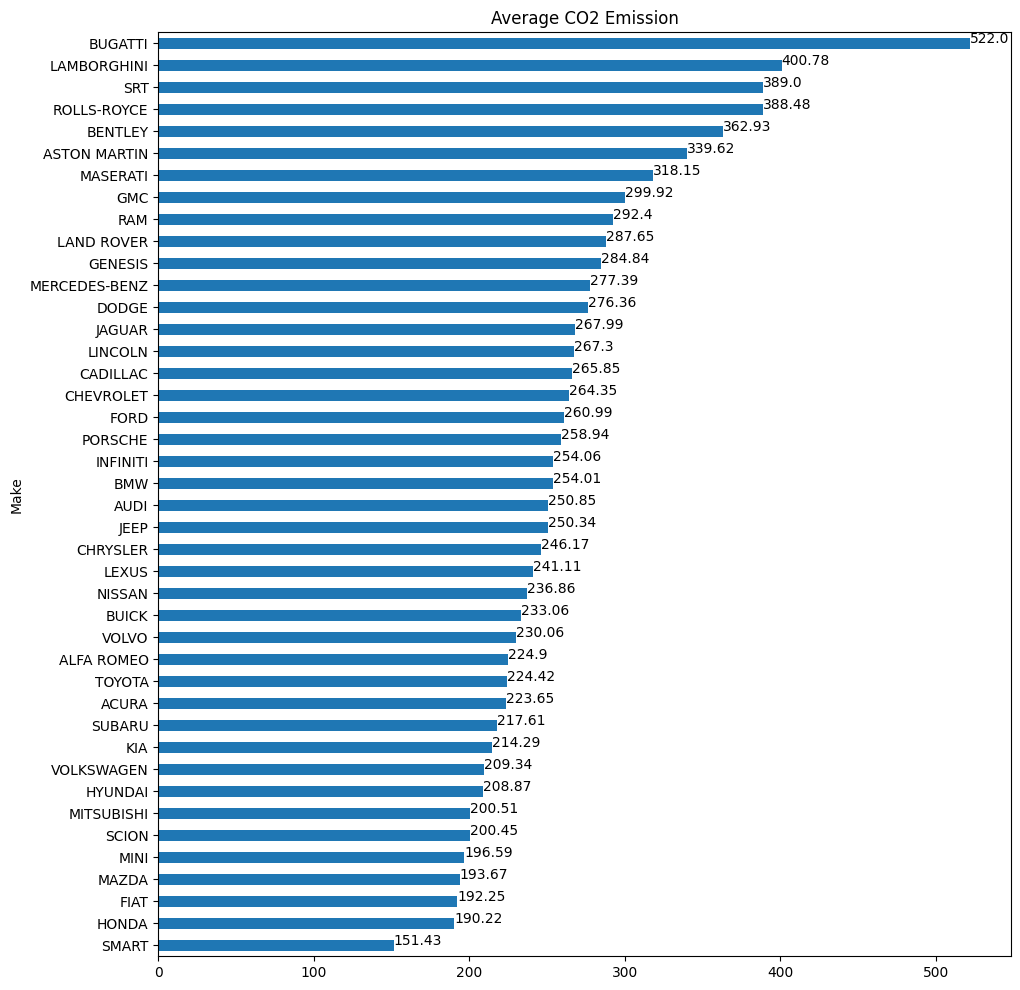

In [27]:
# Average CO2 emmision of all vehicles
co2_emission = df.groupby(['Make'])[['CO2 Emissions(g/km)']].mean().round(2).sort_values('CO2 Emissions(g/km)')
print(co2_emission)

# Bar plot for the data
plot = co2_emission.plot(kind = "barh", figsize = (11, 12), title = "Average CO2 Emission", legend = None)

# For loop to show the respective values at the end of each bar
for key, value in enumerate(co2_emission['CO2 Emissions(g/km)']):
    plt.text(value, key,
             str(value))

# Show the plot 
plt.show(plot)

And, here we calculated the **average CO2 emission of all vehicles**, having:

1. Highest emission of **Bugatti** with average CO2 emission = **522 g/km**
2. Least emission of **Smart** with average CO2 emission = **151.43 g/km**

               CO2 Emissions(g/km)
Make                              
GENESIS                     247.25
LAND ROVER                  240.69
PORSCHE                     232.00
CADILLAC                    225.55
JEEP                        224.19
INFINITI                    221.64
VOLVO                       220.22
BUICK                       217.79
AUDI                        217.27
LINCOLN                     216.97
MERCEDES-BENZ               213.70
GMC                         213.47
JAGUAR                      212.74
BMW                         207.78
SUBARU                      207.28
ALFA ROMEO                  207.13
VOLKSWAGEN                  202.28
ACURA                       201.25
LEXUS                       197.93
FORD                        197.22
MINI                        196.59
KIA                         194.57
MITSUBISHI                  192.19
HYUNDAI                     191.75
FIAT                        189.58
NISSAN                      188.61
CHEVROLET           

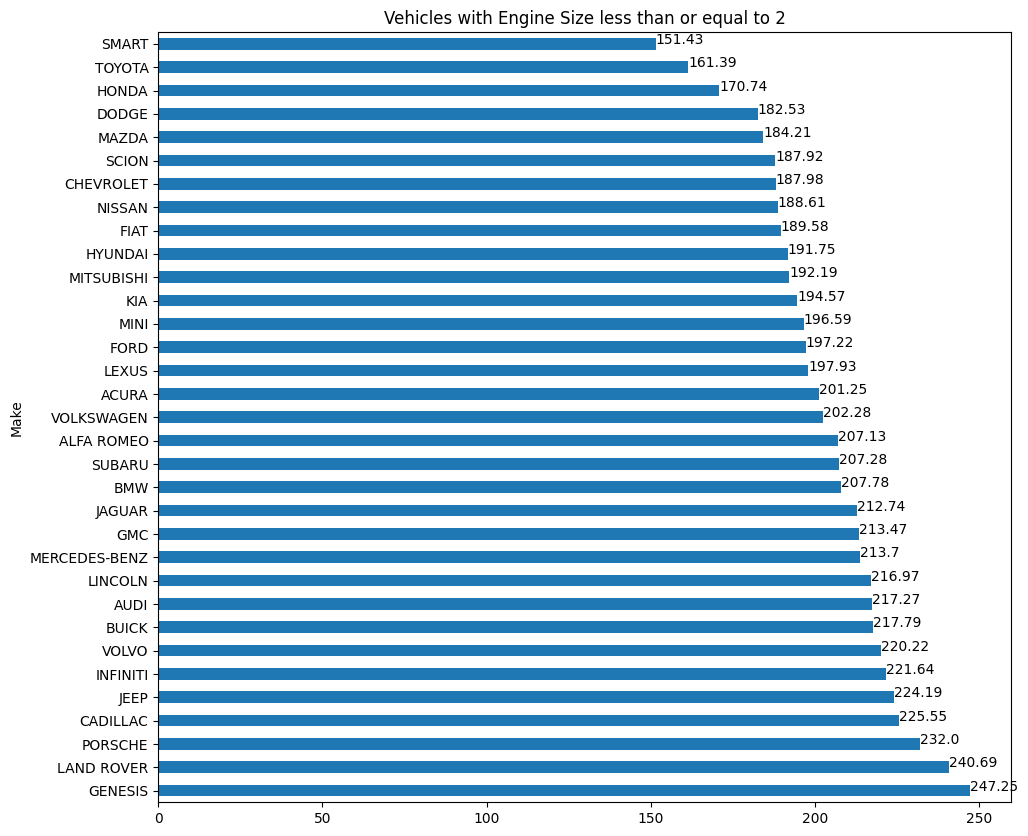

In [28]:
# Vehicles with engine size less than or equal to 2
filtered_cars = df[cars['Engine Size(L)'] <= 2]
smaller_car_engine_size = filtered_cars.groupby(['Make'])[['CO2 Emissions(g/km)']].mean().round(2).sort_values('CO2 Emissions(g/km)', ascending = False)
print(smaller_car_engine_size)

# Bar plot for the data
plot1 = smaller_car_engine_size.plot(kind = "barh", figsize = (11, 10), title = "Vehicles with Engine Size less than or equal to 2", legend = None)

# For loop to show the respective values at the end of each bar
for key, value in enumerate(smaller_car_engine_size['CO2 Emissions(g/km)']):
    plt.text(value, key,
             str(value))

# Show the plot    
plt.show(plot1)

And, here we calculated the **average CO2 emission of vehicles having engine size equal to or smaller than 2**, having:

1. Highest emission of **Genesis** with average CO2 emission = **247.25 g/km**
2. Least emission of **Smart** with average CO2 emission = **151.43 g/km**

# 6. Any other insights you found during your analysis?

- ## Does higher CO2 emitting vehicle brands have more fuel consumption?

**Let us first calculate the average CO2 emmisions of all the vehicles.**

In [29]:
co2_emission = df[['CO2 Emissions(g/km)']].mean().round(2)
print(co2_emission)

CO2 Emissions(g/km)    250.58
dtype: float64


From the above calculation we found that, **average CO2 emissions = 250.58 g/km**.

So, to calculate the CO2 emissions of vehicles having higher emission rate, we need to select the vehicle brands which fall above average emission and then calculate their relation with respect to fuel consumption.

In [30]:
# Calculating the mean of vehicles with respect to Fuel consumption
co2_emission = df.groupby(['Make'])[['CO2 Emissions(g/km)', 'Fuel Consumption Comb (L/100 km)']].mean().round(2).sort_values('CO2 Emissions(g/km)')

# Selecting the above average CO2 emission car
above_avg_emission_car = co2_emission[co2_emission['CO2 Emissions(g/km)'] > 250]
print(above_avg_emission_car)

               CO2 Emissions(g/km)  Fuel Consumption Comb (L/100 km)
Make                                                                
JEEP                        250.34                             10.90
AUDI                        250.85                             10.70
BMW                         254.01                             10.86
INFINITI                    254.06                             10.90
PORSCHE                     258.94                             11.11
FORD                        260.99                             12.00
CHEVROLET                   264.35                             11.97
CADILLAC                    265.85                             11.49
LINCOLN                     267.30                             11.51
JAGUAR                      267.99                             11.65
DODGE                       276.36                             12.51
MERCEDES-BENZ               277.39                             11.92
GENESIS                     284.84

 **Visualizing the data in scatter plot**

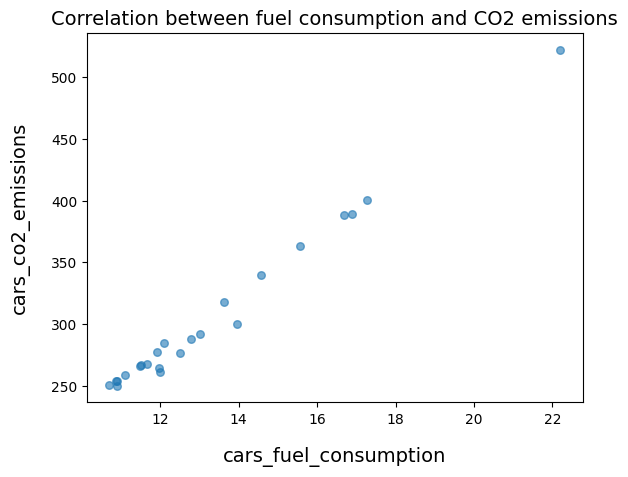

In [31]:
# Scatter plot for the above average CO2 emission vehicle
plt.scatter(above_avg_emission_car['Fuel Consumption Comb (L/100 km)'], above_avg_emission_car['CO2 Emissions(g/km)'], s= 30, alpha = 0.6)
plt.title('Correlation between fuel consumption and CO2 emissions', fontsize=14)
plt.xlabel('cars_fuel_consumption', fontsize=14, labelpad=15)
plt.ylabel('cars_co2_emissions', fontsize=14, labelpad=15)
plt.show()

From the above scatter plot we concluded that, it has a positive correlation between Fuel Cnsumption and CO2 emission. Which shows **the CO2 emission for the vehicles which falls above average emission rate has more fuel consumption**.

And we can conclude a relation, **"CO2 emission ∝ Fuel Cnsumption".**

- ## Most Fuel Efficient Vehicle Make

In [12]:
co2_emission = df.groupby(['Make', 'Model'])[['Fuel Consumption Comb (L/100 km)']].mean().sort_values('Fuel Consumption Comb (L/100 km)')
print(co2_emission)

                                      Fuel Consumption Comb (L/100 km)
Make      Model                                                       
HYUNDAI   IONIQ Blue                                              4.10
          IONIQ BLUE                                              4.10
          IONIQ                                                   4.30
TOYOTA    Prius                                                   4.45
          Corolla Hybrid                                          4.50
...                                                                ...
BUGATTI   CHIRON                                                 22.20
GMC       SAVANA 2500 PASSENGER FFV                              22.35
CHEVROLET EXPRESS 2500 PASSENGER FFV                             22.35
GMC       SAVANA 3500 PASSENGER FFV                              22.55
CHEVROLET EXPRESS 3500 PASSENGER FFV                             22.55

[2053 rows x 1 columns]


So, the most fuel efficient Vehicle Make goes to **"Hyundai- IONIQ BLUE"** having 
**Fuel Consumption Comb (L/100 ) = 4.10 L/km**.

CONGRATS 🎊

- ## Most Fuel Consuming Vehicle Make

In [13]:
co2_emission = df.groupby(['Make', 'Model'])[['Fuel Consumption Comb (L/100 km)']].mean().sort_values('Fuel Consumption Comb (L/100 km)', ascending = False)
print(co2_emission)

                                      Fuel Consumption Comb (L/100 km)
Make      Model                                                       
GMC       SAVANA 3500 PASSENGER FFV                              22.55
CHEVROLET EXPRESS 3500 PASSENGER FFV                             22.55
GMC       SAVANA 2500 PASSENGER FFV                              22.35
CHEVROLET EXPRESS 2500 PASSENGER FFV                             22.35
BUGATTI   Chiron                                                 22.20
...                                                                ...
TOYOTA    Corolla Hybrid                                          4.50
          Prius                                                   4.45
HYUNDAI   IONIQ                                                   4.30
          IONIQ BLUE                                              4.10
          IONIQ Blue                                              4.10

[2053 rows x 1 columns]


So, the most fuel efficient Vehicle Make goes to **"GMC- SAVANA 3500 PASSENGER FFV"** and **"Chevrolet- EXPRESS 3500 PASSENGER FFV"** having 
**Fuel Consumption Comb (L/100 ) = 22.55 L/km**.

HAVE HIGH HOPES 🎊

## 💪 Challenge II
Help your team leader understand your company's products. Include:

1. What is the most expensive item your company sells? The least expensive?
2. How many different products of each category does your company sell?
3. What are the top three brands with the highest average list price? The top three categories?
4. Any other insights you found during your analysis?

## 💾 The data II

### You have access to the following tables:

#### products
- "product_id" - Product identifier.
- "product_name" - The name of the bicycle.
- "brand_id" - You can look up the brand's name in the "brands" table.
- "category_id" - You can look up the category's name in the "categories" table.
- "model_year" - The model year of the bicycle.
- "list_price" - The price of the bicycle.

#### brands
- "brand_id" - Matches the identifier in the "products" table.
- "brand_name" - One of the nine brands the store sells.

#### categories
- "category_id" - Matches the identifier in the "products" table.
- "category_name" - One of the seven product categories in the store.

# 1. What is the most expensive item your company sells? The least expensive?

- ## THE MOST EXPENSIVE PRODUCT OF COMPANY

We can find the most expensive item that company sells by selecting **_product_name_** and **_list_price_** from _**products**_ table and ordering it by **_list_price_** in descending order. 

In [32]:
SELECT product_name,
	   list_price
FROM products
ORDER BY list_price DESC;

,product_name,list_price
0,Trek Domane SLR 9 Disc - 2018,11999.99
1,Trek Domane SLR 8 Disc - 2018,7499.99
2,Trek Domane SL Frameset - 2018,6499.99
3,Trek Domane SL Frameset Women's - 2018,6499.99
4,Trek Emonda SLR 8 - 2018,6499.99
...,...,...
316,Trek Kickster - 2018,159.99
317,Trek Girl's Kickster - 2017,149.99
318,Trek Boy's Kickster - 2015/2017,149.99
319,Sun Bicycles Lil Kitt'n - 2017,109.99


So, we found the most expensive item that company sells is **"Trek Domane SLR 9 Disc - 2018"** which is priced at whopping price of **'$ 11999.99'**.

- ## THE LEAST EXPENSIVE PRODUCT OF COMPANY

We can find the least expensive item that company sells by selecting **_product_name_** and **_list_price_** from _**products**_ table and ordering it by **_list_price_** in ascending  order.

In [33]:
SELECT product_name,
	   list_price
FROM products
ORDER BY list_price;

,product_name,list_price
0,Strider Classic 12 Balance Bike - 2018,89.99
1,Sun Bicycles Lil Kitt'n - 2017,109.99
2,Trek Boy's Kickster - 2015/2017,149.99
3,Trek Girl's Kickster - 2017,149.99
4,Trek Kickster - 2018,159.99
...,...,...
316,Trek Emonda SLR 8 - 2018,6499.99
317,Trek Domane SL Frameset - 2018,6499.99
318,Trek Domane SL Frameset Women's - 2018,6499.99
319,Trek Domane SLR 8 Disc - 2018,7499.99


So, we found the least expensive item that company sells is **"Strider Classic 12 Balance Bike - 2018"** which is priced at an amazing price of **'$ 89.99'**.

# 2. How many different products of each category does your company sell?

**These are the number of products sold by the company from each category:**

In [34]:
SELECT c.category_name AS category,
	   COUNT(p.product_id) as num_of_products
FROM categories as c
LEFT JOIN products as p
ON c.category_id = p.category_id
GROUP BY c.category_name;

,category,num_of_products
0,Children Bicycles,59
1,Comfort Bicycles,30
2,Cruisers Bicycles,78
3,Cyclocross Bicycles,10
4,Electric Bikes,24
5,Mountain Bikes,60
6,Road Bikes,60


From the above collected data, we can infer that **Cruiser Bicycles**, **Mountain Bicycles** and **Road Bicycles** have the top three most variety products.

**This shows people are really getting attracted to bicycle culture, thus company are launching with more products to cater different categories of customer.**

STAY FIT PEOPLE 🚴🏼‍♂️

# 3. What are the top three brands with the highest average list price? The top three categories?

- ### TOP THREE BRANDS WITH HIGHEST AVERAGE LIST PRICE

In [35]:
SELECT TOP (3) b.brand_name AS brand, 
	   AVG(p.list_price) AS avg_list_price
FROM brands AS b
LEFT JOIN products AS p
ON b.brand_id = p.brand_id
GROUP BY b.brand_name
ORDER BY avg_list_price DESC;

,brand,avg_list_price
0,Trek,2500.064074
1,Heller,2172.996666
2,Surly,1331.753600


So, our top three brands having average list price are: 

**1. Trek** 🥇

**2. Heller** 🥈

**3. Surly** 🥉

- ### TOP THREE CATEGORIES WITH HIGHEST AVERAGE LIST PRICE

In [36]:
SELECT TOP (3) c.category_name AS category, 
	   AVG(p.list_price) AS avg_list_price
FROM categories AS c
LEFT JOIN products AS p
ON c.category_id = p.category_id
GROUP BY c.category_name
ORDER BY avg_list_price DESC;

,category,avg_list_price
0,Electric Bikes,3281.656666
1,Road Bikes,3175.357333
2,Cyclocross Bicycles,2542.793000


So, our top three brands having average list price are: 

**1. Electric Bikes** 🥇

**2. Road Bikes** 🥈

**3. Cyclocross Bicycles** 🥉

This shows people are heading into electric mobility, HURRAH!!! 🎊

# 4. Any other insights you found during your analysis?

- ## How many products released by each brand between year 2016 - 2018?

In [37]:
SELECT b.brand_name,  
       COUNT(product_name) AS products_released
FROM brands AS b
LEFT JOIN products AS p
ON b.brand_id = p.brand_id
WHERE p.model_year BETWEEN 2016 AND 2018
GROUP BY b.brand_name
ORDER BY COUNT(product_name) DESC;

,brand_name,products_released
0,Trek,129
1,Electra,118
2,Surly,25
3,Sun Bicycles,23
4,Haro,10
5,Heller,3
6,Pure Cycles,3
7,Strider,3
8,Ritchey,1


From this analysis, we found that:

**1. Trek** 🥇

**2. Electra** 🥈

**3. Surly** 🥉

are the top brands to release highest number of products between year 2016-2018.

- ## **Number of girl's products launched between 2016-2018**

Here, we first created a Common Table Expression (CTE) to extract out the data having keyword 'Girl' and then fetched our required conditional data from that CTE.

In [67]:
WITH girls_product_list AS (SELECT product_name, model_year
							FROM products
							WHERE product_name LIKE '%Girl%')
                            
SELECT COUNT(product_name) AS total_girls_products
FROM girls_product_list
WHERE model_year BETWEEN 2016 AND 2018;

,total_girls_products
0,25


**So, the total girl's products launched between the year 2016 - 2018 are 25.** 🎊 

- ## **Number of boy's products launched between 2016-2018**

Here, we first created a Common Table Expression (CTE) to extract out the data having keyword 'Boy' and then fetched our required conditional data from that CTE.

In [66]:
WITH boys_product_list AS (SELECT product_name, model_year
							FROM products
							WHERE product_name LIKE '%Boy%')
                            
SELECT COUNT(product_name) AS total_boys_products
FROM boys_product_list
WHERE model_year BETWEEN 2016 AND 2018;

,total_boys_products
0,18


**So, the total boy's products launched between the year 2016 - 2018 are 18.** 🎊 

## ⌛️ Thank You. It is finished!🎊